## Create CSV fle from victim's data image

In [2]:
from PIL import Image
import numpy
im = Image.open("dots_victims_data.png")
imarray = numpy.array(im)
imarray.shape

(1783, 1201, 4)

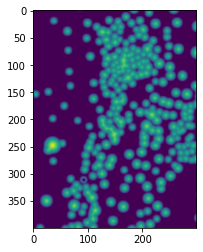

In [3]:
import matplotlib.pyplot as plt
array_sm = imarray[600:1000,200:500,1]
plt.imshow(array_sm)

In [4]:
import numpy as np
import pandas as pd

img_data = imarray[:,:,0]
# img_data = array_sm
gradient_dir = np.array(np.gradient(img_data))

dy = gradient_dir[0].ravel()
dx = gradient_dir[1].ravel()
scale = np.maximum(np.absolute(dy), numpy.ones(dy.shape))
scale = np.maximum(scale, np.absolute(dx))
dy_norm = dy/scale
dx_norm = dx/scale
y = np.array(range(gradient_dir[0].shape[0]))
x = np.array(range(gradient_dir[0].shape[1]))
yx = np.array(np.meshgrid(y, x)).T.reshape(-1,2)

gradient_data = pd.DataFrame(np.column_stack((yx, dy, dx, dy_norm, dx_norm)),  columns=['y', 'x', 'dy', 'dx', 'dy_norm', 'dx_norm'])


In [5]:
gradient_data['norm'] = (gradient_data.dy**2 + gradient_data.dx**2)**(1/2)
gradient_data['norm_norm'] = (gradient_data['norm']-gradient_data['norm'].min())/(gradient_data['norm'].max()-gradient_data['norm'].min())

In [6]:
gradient_data.to_csv('data_smooth.csv', index=False)